# Question 1

**Problem 1:**

Let's walk us step by step through the process. When $y \geq 0 : \rho_\tau(y) = \tau y$ and $y < 0 : \rho_\tau(y) = (\tau - 1) y$. In $(y-q)$, the loss would be $(y-q) \geq 0 : \tau (y-q)$ and $(y-q) < 0 : (\tau - 1) (y-q)$. So, for observations above $q$ we will multiply the *distance* by $\tau$ and for observations below $q$ we will multiply by $\tau -1$. Since $\tau \in \{0, 1\}$, $(\tau -1) < 0$. 

Because the loss will depend on the value we choose for $\tau$, when $\tau > 0.5$ then the positive deviations are more heavily penalized and the other way around when $\tau < 0.5$. The optimal solution $q^\star$ will balance these weighted losses and will lead to having a $\tau$ proportion of observations below $q^\star$. Therefore, $q^\star$ will be the $\tau$ th quantile of $Y$.

**Problem 2:**

The OLS coefficients represent the average change in $Y$ associated with an one-unit change in $X$, holding all other variables constant. These estimates describe the mean relationship between the dependant variable and the independent variables.

For QR, the coefficients represent the change in the $\tau$ th quantile of $Y$ associated with a one-unit change in $X$, holding other variables constant. These estimates descibe the relationship at different points of the conditional distribution of $Y$. 

OLS provides a single estimate for the "average" effect. QR provides multiple estimates showing how the relationship varies across the distribution and can reveal heterogeneous effects that OLS might miss. By this, QR will be more robust to outliers and non-normal distributions.

**Problem 3:**

The assumptions required for OLS to make a causal interpretation of the regression model are:


**OLS Assumptions:**
* Exogeneity: $E[\varepsilon|X]$ = 0 (mean independence)
* Linear relationship between $Y$ and $X$
* No omitted variable bias
* No reverse causality
* No measurement error
* Independent and identically distributed (i.i.d.) observations

**Quantile Regression Assumptions:**
* Conditional quantile independence: $Q_\gamma (\varepsilon|X) = 0$
* Linear relationship between quantiles of $Y$ and $X$
* No omitted variable bias at the specific quantile level
* No reverse causality
* No measurement error
* Independent observations

As a comparison between OLS and QR assumptions:

| Aspect | OLS | Quantile Regression |
|--------|-----|-------------------|
| Independence Requirements | Requires mean independence ($E[\varepsilon\|X] = 0$) | Requires quantile independence at specific τ level ($Q_\gamma (\varepsilon\|X) = 0$)|
| Linearity Assumptions | Assumes linearity in means | Assumes linearity in quantiles |
| Heterogeneity | Assumes homogeneous effects across distribution | Allows for heterogeneous effects at different quantiles |

**Problem 4:**

In [43]:
import pandas as pd
import numpy as np
#from statsmodels.regression.quantreg import QuantReg
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from stargazer.stargazer import Stargazer

# Load and prepare data
df = pd.read_csv("data_qr.csv")
y = df['birthweight']
X = df.drop('birthweight', axis=1)
X = sm.add_constant(X)

# Run OLS regression
ols_model = OLS(y, X).fit()

# Create Stargazer table
stargazer = Stargazer([ols_model])
stargazer.title("Birthweight Regression Results")
stargazer.custom_columns(['OLS'])
stargazer.significant_digits(3)
stargazer.show_degrees_of_freedom(False)
# Convert to LaTeX and display
stargazer


**Problem 5:**

In [44]:
# Run QR regression with 10 tau values between 0 and 1 (not 0 and 100, as QuantReg expects tau to be between 0 and 1)
taus = np.linspace(0.1, 0.9, 9)  # 9 values between 0.1 and 0.9, plus the 0.01 and 0.99 values below
qr_models = [sm.QuantReg(y, X).fit(q=tau) for tau in [0.01] + list(taus) + [0.99]]

# Create Stargazer table for QR
stargazer_qr = Stargazer(qr_models)
stargazer_qr.title("Quantile Regression Results")
stargazer_qr.custom_columns([f'QR ({tau*100:.0f}th)'.format(tau=tau) for tau in [0.01] + list(taus) + [0.99]])
stargazer_qr.significant_digits(3)
stargazer_qr.show_degrees_of_freedom(False)

# Convert to LaTeX and display
stargazer_qr

e:\Anaconda\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
e:\Anaconda\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
e:\Anaconda\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
e:\Anaconda\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


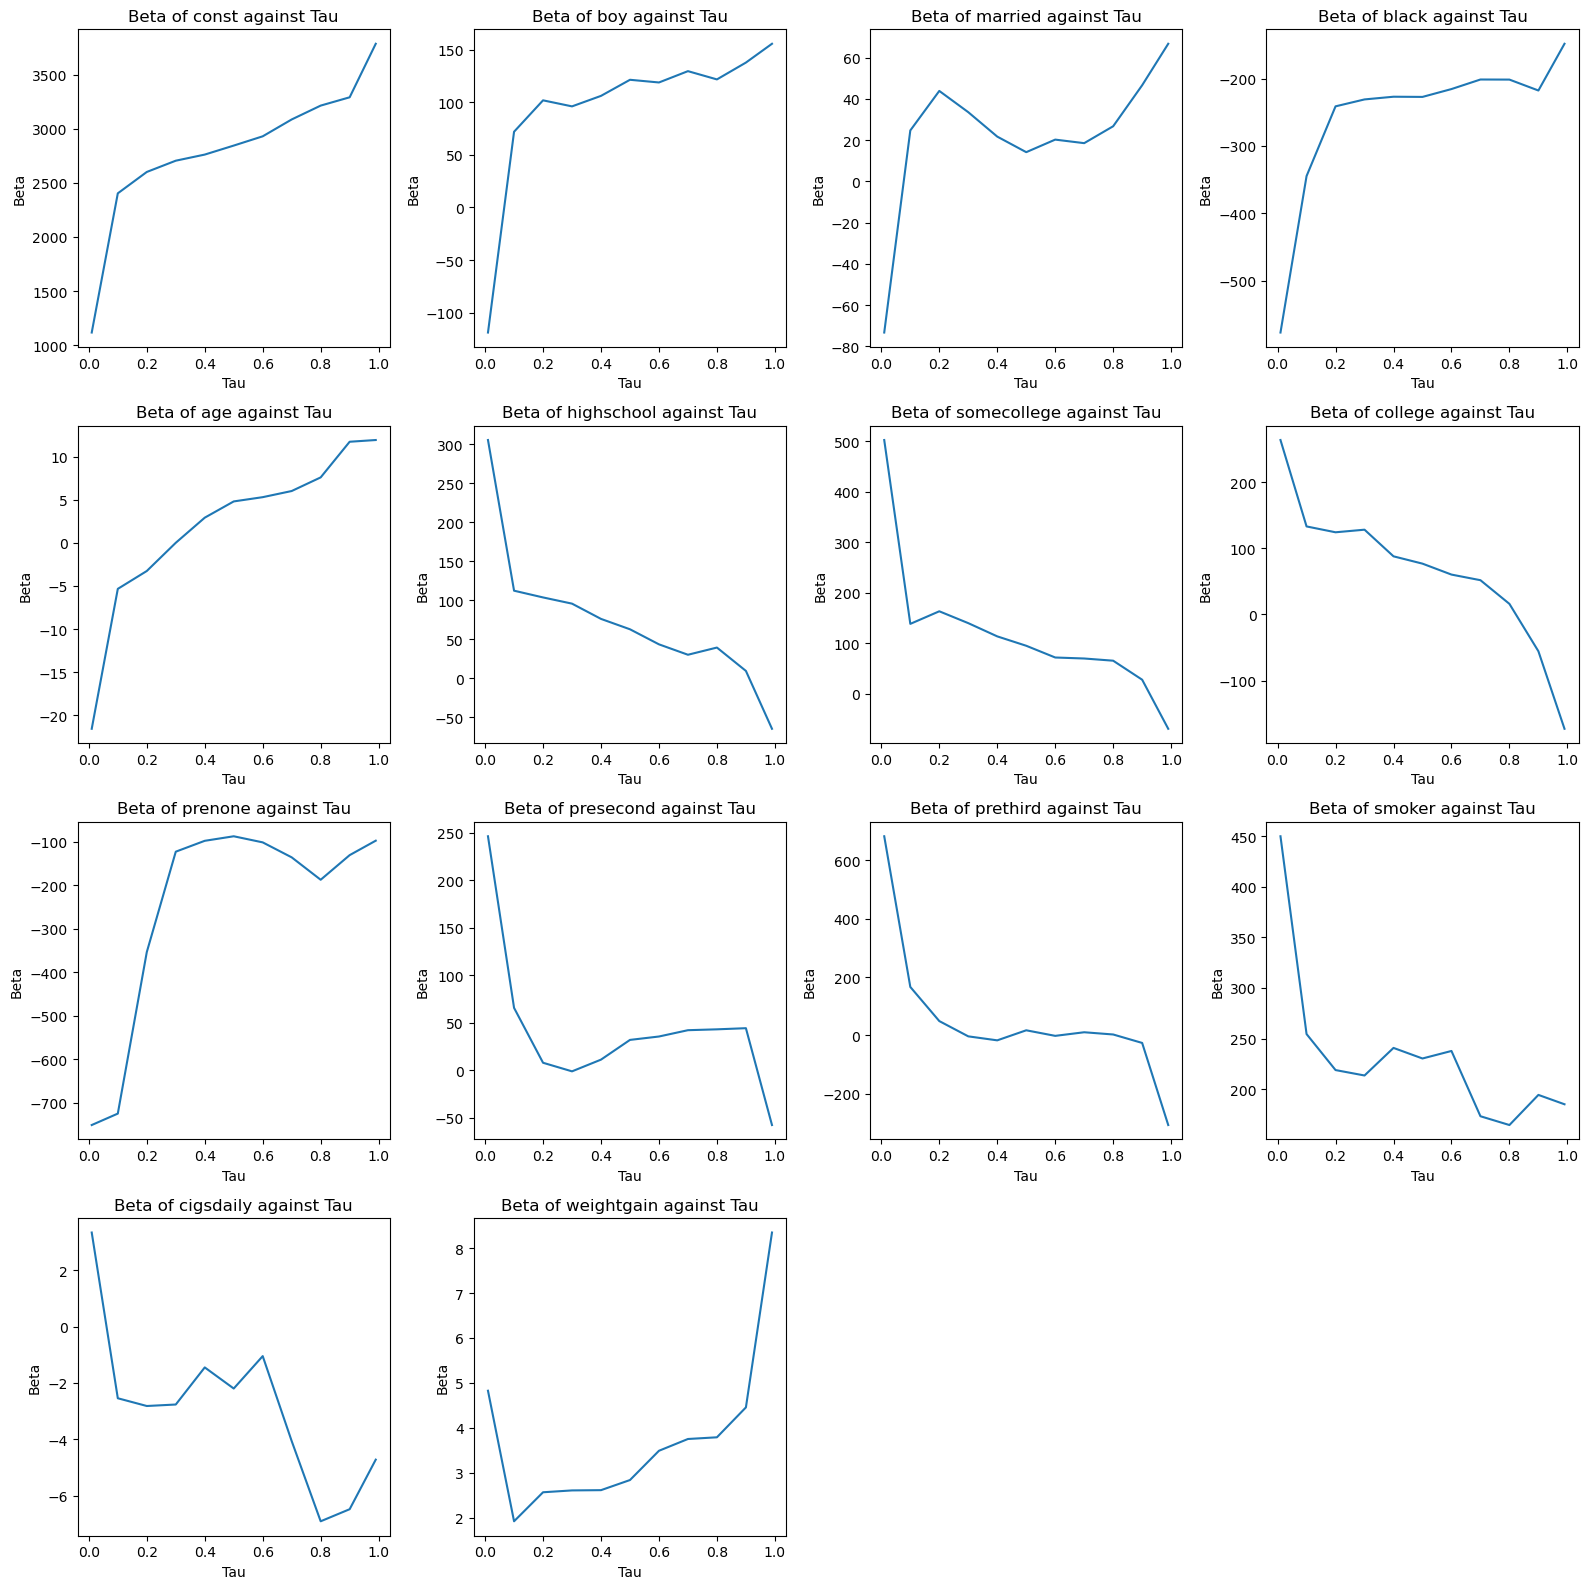

In [45]:
import matplotlib.pyplot as plt

# Extract coefficients from QR models
betas = [model.params for model in qr_models]

# Calculate number of rows and columns needed
n_vars = len(X.columns)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division to get minimum rows needed

# Create figure with exact number of subplots needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))

# Flatten the axs array to iterate over it
axs = axs.flatten()

# Iterate over variables and plot betas against taus
for i, var in enumerate(X.columns):
    axs[i].plot([0.01] + list(taus) + [0.99], [beta[i] for beta in betas])
    axs[i].set_title(f'Beta of {var} against Tau')
    axs[i].set_xlabel('Tau')
    axs[i].set_ylabel('Beta')

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

**Problem 6:**

Looking at the plots above, we can compare the OLS estimates to the QR estimates. The OLS estimates provide a single coefficient for each variable that represents the average effect across all quantiles. In contrast, the QR estimates show how the effect varies across different quantiles of the dependent variable.

From the coefficient plots, we can observe that:
1. Some variables show relatively stable effects across quantiles, suggesting their impact is fairly uniform (similar to OLS)
2. Other variables exhibit varying effects across quantiles, indicating heterogeneous relationships that OLS cannot capture
3. The QR estimates at the median (τ=0.5) are often similar to OLS estimates, but can differ substantially at the tails

This comparison highlights that while OLS provides a useful average effect, QR reveals important variations in the relationships across the distribution that OLS masks.


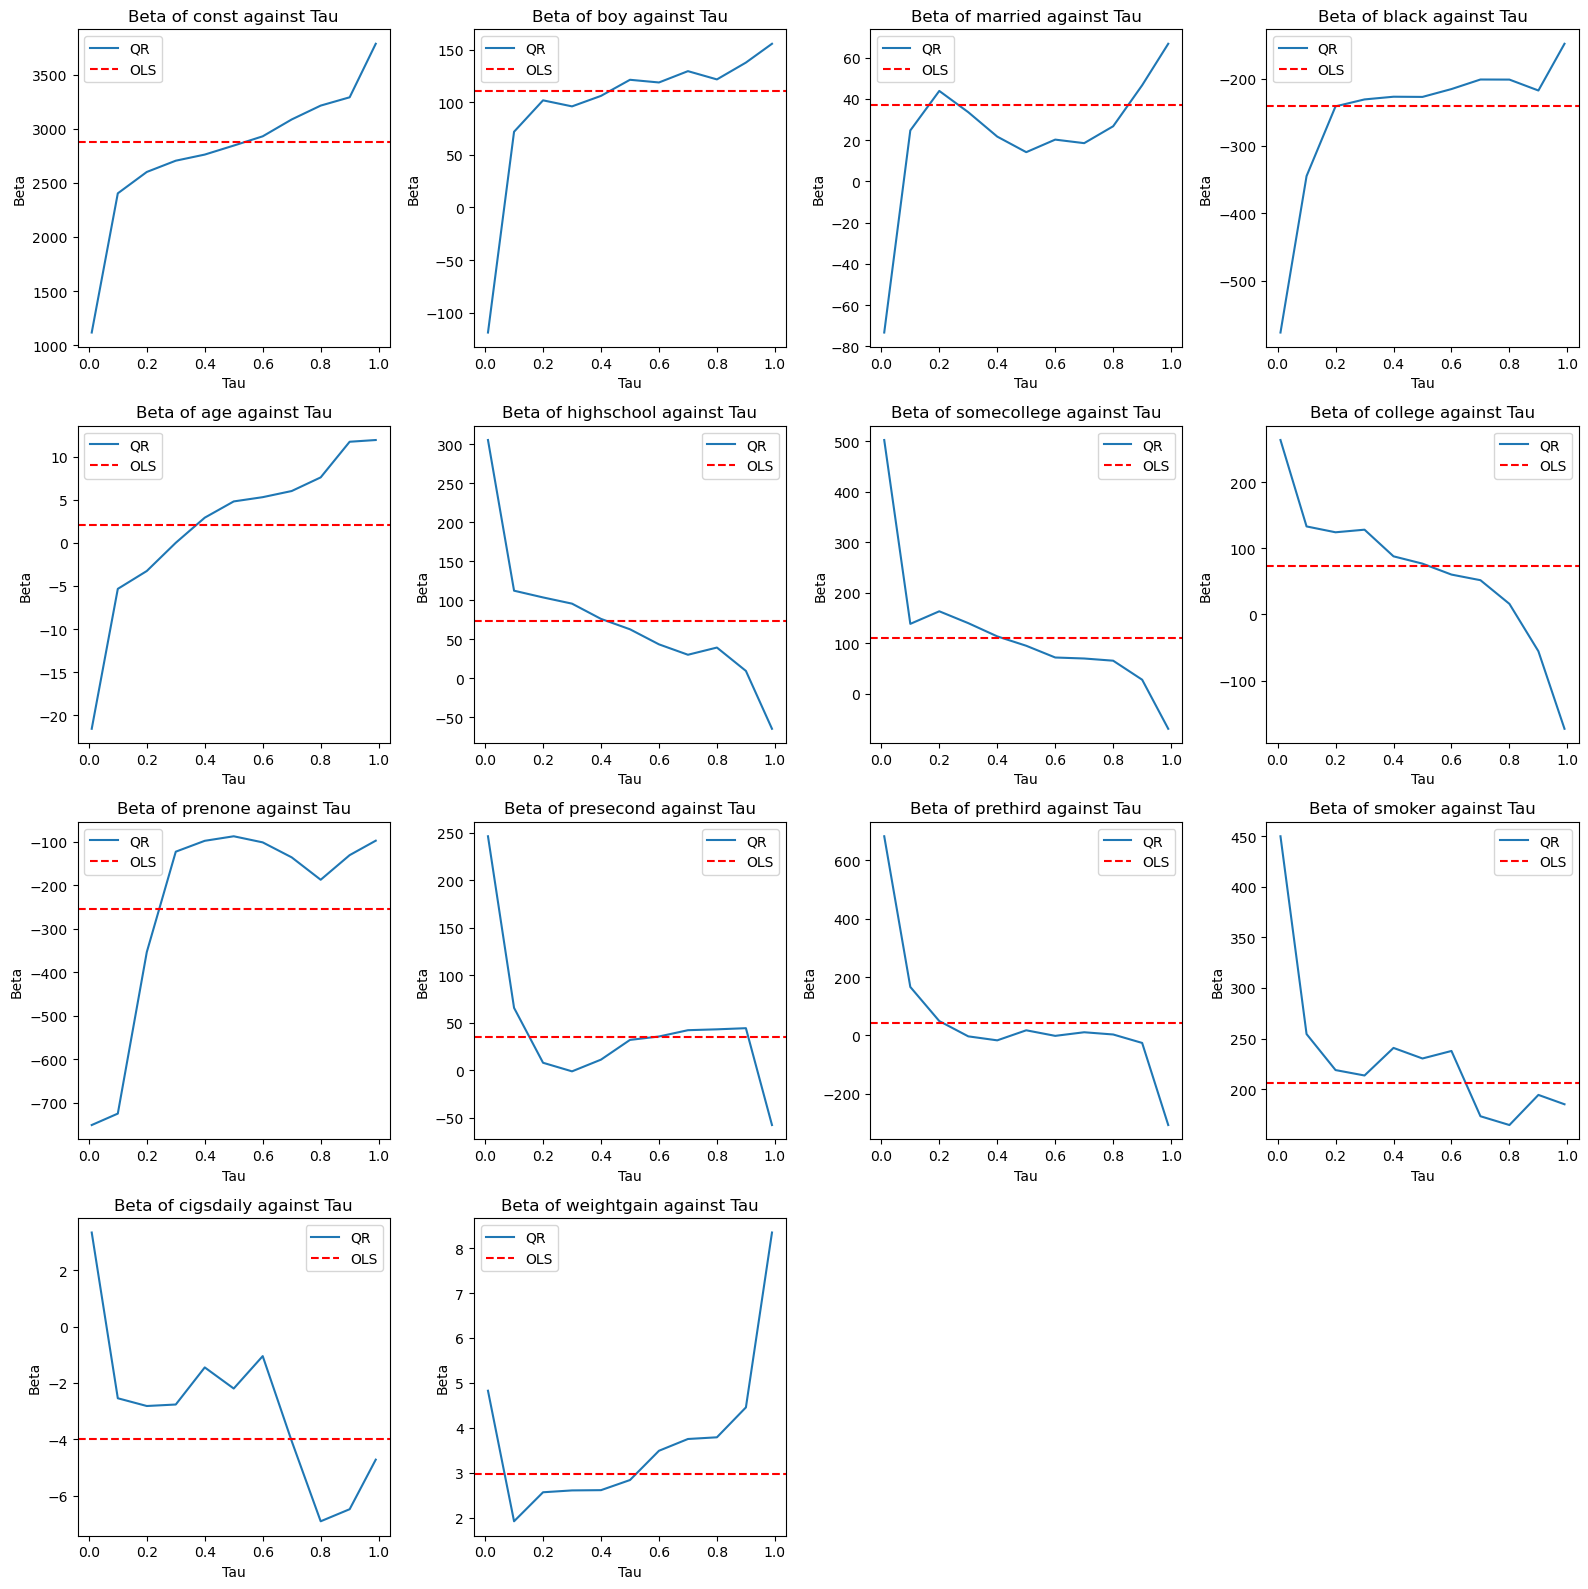

In [46]:
# Extract OLS coefficients
ols_coefs = ols_model.params

# Create figure with exact number of subplots needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))

# Flatten the axs array to iterate over it
axs = axs.flatten()

# Iterate over variables and plot betas against taus
for i, var in enumerate(X.columns):
    # Plot QR coefficients
    axs[i].plot([0.01] + list(taus) + [0.99], [beta[i] for beta in betas], label='QR')
    # Add horizontal line for OLS coefficient
    axs[i].axhline(y=ols_coefs[i], color='r', linestyle='--', label='OLS')
    axs[i].set_title(f'Beta of {var} against Tau')
    axs[i].set_xlabel('Tau')
    axs[i].set_ylabel('Beta')
    axs[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()


**Problem 7:**

The sum of OLS residuals is (approximately) zero because OLS minimizes the sum of squared residuals subject to the constraint that residuals sum to zero - this is a key property of OLS estimation. We typically expect very few or no residuals to be exactly zero since the dependent variable is continuous and the probability of a prediction exactly matching the actual value is very small.

In [47]:
# Calculate sum of OLS residuals
residuals_sum = ols_model.resid.sum()
print(f"Sum of OLS residuals: {residuals_sum:.10f}")

# Count number of residuals that are exactly zero
zero_residuals = (ols_model.resid == 0).sum()
print(f"\nNumber of residuals that are exactly zero: {zero_residuals}")

Sum of OLS residuals: 0.0000000374

Number of residuals that are exactly zero: 0


**Problem 8:**

For quantile regression with a given $\tau$ of, let's say, 0.4, we do not expect the sum of residuals to be zero, unlike OLS. This is because quantile regression minimizes a different objective function - it minimizes the sum of asymmetrically weighted absolute residuals, where positive residuals get weight $\tau$ and negative residuals get weight $(1-\tau)$. The first order condition for QR requires that approximately $\tau$ fraction of residuals are positive and $(1-\tau)$ fraction are negative, but does not require that they sum to zero.

What we do see is that there are 13 residuals that are approximately zero, and that we also had 13 variables in our model.

Note: This finding holds for any value of $\tau$ between 0 and 1, not just $\tau=0.4$. The key insight is that QR's objective function and first order conditions fundamentally differ from OLS, regardless of the specific $\tau$ value chosen.

In [48]:
# Choose tau = 0.4 from existing models
tau_idx = np.where(taus == 0.4)[0][0]
qr_model = qr_models[tau_idx]

# Calculate residuals
qr_residuals = qr_model.resid

# Calculate sum of residuals
qr_residuals_sum = qr_residuals.sum()
print(f"Sum of QR residuals (tau=0.4): {qr_residuals_sum:.10f}")

# Count residuals close to zero (using small tolerance)
tolerance = np.exp(-10)
zero_qr_residuals = (abs(qr_residuals) < tolerance).sum()
print(f"\nNumber of QR residuals approximately zero: {zero_qr_residuals}")

Sum of QR residuals (tau=0.4): 2077774.1507408321

Number of QR residuals approximately zero: 13


**Problem 9:**

(statsmodels does not provide the dual solutions for QR, so I will write my own function to do so which should be the same as the one provided in R)

In [49]:
def get_dual_solution(model, tau):
    # Get residuals
    residuals = model.resid
    dual = np.where(residuals > 0, tau, tau - 1)
    
    return dual

# For a single model
tau = 0.4
dual_solution = get_dual_solution(qr_models[3], tau)

# Create a table with dual solutions and residuals
print(f"Dual solutions and residuals for tau={tau}:")
print("\nDual Solution | Residual")
print("-" * 30)
for dual, resid in zip(dual_solution[:10], qr_models[3].resid[:10]):
    print(f"{dual:11.4f} | {resid:8.4f}")

Dual solutions and residuals for tau=0.4:

Dual Solution | Residual
------------------------------
     0.4000 |  41.8420
     0.4000 | 791.8336
     0.4000 | 1130.1756
    -0.6000 | -486.1312
    -0.6000 | -98.3926
    -0.6000 | -429.7819
     0.4000 | 671.9445
     0.4000 | 668.3290
    -0.6000 | -383.1867
    -0.6000 | -75.8466


**Problem 10:**

From Problem 8, we found that there were exactly $h$ residuals equal to zero, where $h$ is the number of variables in our model. The key insights are: points with zero residuals lie exactly on the fitted regression plane. In p-dimensional space (where $p$ is the number of parameters), a plane is uniquely determined by $p$ points. The quantile regression solution will always pass through exactly $p$ data points. Therefore, we can recover $\beta_\tau$ by:
* Finding the $h$ observations with zero residuals
* Using these observations to solve a system of $h$ linear equations

This solution must be the same as our original quantile regression coefficients

**Problem 11:**

1) First, let's handle $|x_2 - 10|$ in the objective function:
   - Introduce a new variable $t_1$ where $t_1 \geq |x_2 - 10|$
   - This can be written as two constraints:
   
   $$t_1 \geq x_2 - 10$$
   $$t_1 \geq -(x_2 - 10)$$

2) For the constraint $|x_1 + 2| + |x_2| \leq 5$:
   - Let's introduce $t_2 = |x_1 + 2|$ and $t_3 = |x_2|$
   - Then we can write:
   
   $$t_2 \geq x_1 + 2$$
   $$t_2 \geq -(x_1 + 2)$$
   $$t_3 \geq x_2$$
   $$t_3 \geq -x_2$$
   $$t_2 + t_3 \leq 5$$

3) The complete linear programming formulation becomes:

$$\text{minimize} \quad 2x_1 + 3t_1$$

subject to:
$$t_1 \geq x_2 - 10$$
$$t_1 \geq -(x_2 - 10)$$
$$t_2 \geq x_1 + 2$$
$$t_2 \geq -(x_1 + 2)$$
$$t_3 \geq x_2$$
$$t_3 \geq -x_2$$
$$t_2 + t_3 \leq 5$$

All variables $(x_1, x_2, t_1, t_2, t_3)$ are unrestricted in sign. This is now a standard linear programming problem with linear objective function and linear constraints.

**Problem 13**

The set $P$ is defined as:
   $$
   P = \{\mathbf{x} \in \mathbb{R}^n \mid a_i' \mathbf{x} \leq b_i, \, i = 1, \dots, m\}
   $$

   where each $ a_i \in \mathbb{R}^n $ is a vector representing the coefficients of the $ i $-th inequality, and $ b_i $ is a scalar.

Our goal is to find the largest radius $ r $ such that a ball with radius $ r $ and center $ \mathbf{y} $ remains within $P$. This can be formalized as maximizing $r$ subject to the condition that all points on the boundary of the ball lie within the polyhedron $P$.

For the ball centered at $ \mathbf{y} $ with radius $ r $ to lie within $ P $, the following condition must hold for all $ i = 1, \dots, m $:
   $$
   a_i' \mathbf{y} + r \| a_i \| \leq b_i
   $$
   where $ \| a_i \| $ represents the Euclidean norm of $ a_i $. This constraint ensures that the furthest point in the direction of $ a_i $, which would be $ \mathbf{y} + r \frac{a_i}{\| a_i \|} $, remains within $ P $.

To maximize $ r $, we set up the following linear program:
   $$
   \max_{\mathbf{y}, r} \, r
   $$
   subject to
   $$
   a_i' \mathbf{y} + r \| a_i \| \leq b_i, \quad i = 1, \dots, m.
   $$

To express this problem in standard linear programming form (maximizing an objective function subject to linear inequalities), we rewrite it as follows:

- Let $ \mathbf{z} = \begin{bmatrix} \mathbf{y} \\ r \end{bmatrix} \in \mathbb{R}^{n+1} $.
- Maximize $ c' \mathbf{z} = r $, where $ c = \begin{bmatrix} 0 \\ \dots \\ 0 \\ 1 \end{bmatrix} $ (i.e., a vector of zeros in the first $ n $ entries and a 1 in the last entry).
- Rewrite each inequality in terms of $ \mathbf{z} $:
  $$
  \begin{bmatrix} a_i' & \| a_i \| \end{bmatrix} \mathbf{z} \leq b_i, \quad i = 1, \dots, m.
  $$

So, the linear program in standard form is:

$$
\max \, c' \mathbf{z} = \max \, r
$$
subject to
$$
\begin{bmatrix} a_1' & \| a_1 \| \\ \vdots & \vdots \\ a_m' & \| a_m \| \end{bmatrix} \begin{bmatrix} \mathbf{y} \\ r \end{bmatrix} \leq \begin{bmatrix} b_1 \\ \vdots \\ b_m \end{bmatrix}.
$$

This is a linear programming problem with an objective to maximize $ r $, subject to linear inequality constraints, which can be solved using standard linear programming methods.

**Problem 14:**

Since $ A \mathbf{x}^* = \mathbf{c} $ and $ \mathbf{x}^* \geq 0 $, $ \mathbf{x}^* $ satisfies the constraints of the problem:
   $$
   A \mathbf{x}^* \geq \mathbf{c} \quad \text{and} \quad \mathbf{x}^* \geq 0.
   $$
   
   Therefore, $ \mathbf{x}^* $ is a feasible solution to the problem.


For the inequality constraint $ A \mathbf{x} \geq \mathbf{c} $ with a feasible solution $ \mathbf{x}^* $ satisfying $ A \mathbf{x}^* = \mathbf{c} $, the slack variables associated with the constraints are zero, as equality holds:
   $$
   A \mathbf{x}^* - \mathbf{c} = 0.
   $$
   
   Since there is no slack in the constraints, this implies that any increase in $ \mathbf{x} $ would violate the constraint $ A \mathbf{x} \geq \mathbf{c} $.

Consider any other feasible solution $ \mathbf{x} $ that satisfies $ A \mathbf{x} \geq \mathbf{c} $ and $ \mathbf{x} \geq 0 $. Given that $ A $ is a symmetric square matrix, if $ \mathbf{x} \neq \mathbf{x}^* $, we would have $ A \mathbf{x} \geq \mathbf{c} $, which cannot strictly reduce the objective function value without violating feasibility. Thus, $ \mathbf{x}^* $, which satisfies $ A \mathbf{x}^* = \mathbf{c} $, achieves the minimum possible objective function value for all feasible $ \mathbf{x} $.

Since $ \mathbf{x}^* $ is feasible and there exists no feasible solution with a lower objective function value, $ \mathbf{x}^* $ is indeed the optimal solution.

**Problem 15:**

To show the equivalence of the two dual formulations of the quantile regression problem, we need to demonstrate that both formulations are representing the same optimization problem from different perspectives.

*Problem 1 (Dual Formulation 1)*
$$
\max_{\mathbf{d}} \, \mathbf{Y}^T \mathbf{d}
$$
subject to
$$
X^T \mathbf{d} = 0, \quad (\tau - 1) \mathbf{1}_n \leq \mathbf{d} \leq \tau \mathbf{1}_n.
$$

*Problem 2 (Dual Formulation 2)*
$$
\max_{\mathbf{a}} \, \mathbf{Y}^T \mathbf{a}
$$
subject to
$$
X^T \mathbf{a} = (1 - \tau) X^T \mathbf{1}_n, \quad \mathbf{a} \in [0, 1]^n.
$$

Set $ \mathbf{a} = \frac{\mathbf{d} - (\tau - 1) \mathbf{1}_n}{\tau - (\tau - 1)} $. This transformation maps $ \mathbf{d} $ to $ \mathbf{a} \in [0,1]^n $. Under this transformation, the constraints on $ \mathbf{d} $ map to the constraints on $ \mathbf{a} $. Substituting this transformation into the objective functions shows that both maximize $ \mathbf{Y} $ with respect to the same effective feasible region.

Thus, the two dual formulations are equivalent.

# Question 3

**Problem 16**

The first exclusion restriction is:
$$
E[Y | X, D, A, Z] = X \beta_X + D \beta_D + A.
$$
This condition implies that the effect of the instrument $ Z $ on the outcome $ Y $ is fully mediated through $ X $, $ D $, and $ A $. In other words, once we control for $ X $, $ D $, and $ A $, the instrument $ Z $ has no direct effect on $ Y $. This is achieved by setting the coefficient $\beta_Z$ on $ Z $ to zero in the regression for $ Y $. 

This restriction helps us identify causal effects of $ D $ on $ Y $ by ensuring that any variation in $ Y $ associated with changes in $ Z $ does not directly affect $ Y $, but only through $ D $, mediated by $ X $ and $ A $. Here, this regression setup is termed the "long regression" because it includes all relevant controls and explanatory variables.

The second exclusion restriction is:
$$
E[A | X, Z] = X \lambda_X.
$$
This condition suggests that the variable $ A $ (an endogenous variable that potentially affects $ Y $) is independent of $ Z $ once we control for $ X $. It implies that any relationship between $ A $ and $ Z $ is fully explained by $ X $, which helps satisfy the requirement for valid instrumental variables in causal inference. 

This restriction can hold under certain assumptions, such as the random assignment of $ Z $. If $ Z $ is randomly assigned, it is uncorrelated with unobservable factors that affect $ A $, making $ Z $ a valid instrument for estimating the causal effect of $ D $ on $ Y $.

**Problem 17:**

We have the "long regression" as:
$$
E[Y | X, D, A, Z] = X \beta_X + D \beta_D + A \beta_A + Z \beta_Z.
$$
Our "short regression" is given by:
$$
E^* [Y | X, Z] = X \gamma_X + Z \gamma_Z.
$$

In the short regression, we are only controlling for $X$ and $Z$, while omitting the variables $D$ and $A$.

The omitted variable bias formula states that the coefficients in the short regression $(\gamma_X, \gamma_Z)$ relate to the coefficients in the long regression $(\beta_X, \beta_Z)$ and the coefficients on the omitted variables $(\beta_D, \beta_A)$.

Thus, using the OVB formula, we have:

$$
\begin{bmatrix}
\gamma_X \\
\gamma_Z
\end{bmatrix} =
\begin{bmatrix}
\beta_X \\
\beta_Z
\end{bmatrix} + E\left[((X, Z)^T (X, Z))^{-1}\right] E\left[(X, Z)^T (D, A)\right]
\begin{bmatrix}
\beta_D \\
\beta_A
\end{bmatrix}.
$$

This expression represents the coefficients $(\gamma_X, \gamma_Z)$ in the short regression $E^*[Y | X, Z]$ as a combination of the "true" coefficients $(\beta_X, \beta_Z)$ and an adjustment term that accounts for the omitted variable bias due to leaving out $D$ and $A$.

**Problem 18:**

From Problem 17, we have the omitted variable bias (OVB) formula:
$$
\begin{bmatrix}
\gamma_X \\
\gamma_Z
\end{bmatrix} = 
\begin{bmatrix}
\beta_X \\
\beta_Z
\end{bmatrix} + E\left[((X, Z)^T (X, Z))^{-1}\right] E\left[(X, Z)^T (D, A)\right] 
\begin{bmatrix}
\beta_D \\
\beta_A
\end{bmatrix}.
$$

So... to arrive to the two-stage least squares estimator, we need to do a couple of steps:

   - Let $\gamma_{D \sim X+Z} \in \mathbb{R}^{(p_X + p_Z) \times p_D}$ be the best linear predictor coefficient for the regression of $D$ on $(X, Z)$.
   - In other words, $\gamma_{D \sim X+Z}$ represents the coefficients obtained by regressing $D$ on the combined variables $(X, Z)$.

   - We can partition $\gamma_{D \sim X+Z}$ into two parts, corresponding to the rows associated with $X$ and $Z$.
   - Specifically, denote the part of $\gamma_{D \sim X+Z}$ corresponding to $Z$ as $(\gamma_{D \sim X+Z})_Z$. This is the submatrix of $\gamma_{D \sim X+Z}$ containing only the rows corresponding to the variables $Z$, and it has dimensions $p_Z \times p_D$.

   - From the OVB formula, we have that the coefficients $\gamma_Z$ in the short regression are related to $\beta_Z$, $\beta_D$, and $\gamma_{D \sim X+Z}$.
   - To isolate $\beta_D$, we can rearrange this expression as:
     $$
     \beta_D = (\gamma_{D \sim X+Z})_Z^{-1} \gamma_Z.
     $$

This completes the derivation of the two-stage least squares estimator in the form given.

**Problem 19:**

In the two-stage least squares (2SLS) estimator, we are trying to estimate $ \beta_D $ in a model where $ D $ is potentially endogenous. By using $ Z $ as an instrument, we can control for the endogeneity in $ D $.

The result from Problem 18 states that:
$$
\beta_D = (\gamma_{D \sim Z})^{-1} \gamma_Z,
$$

where $ \gamma_{D \sim Z} $ is the best linear predictor coefficient for $ D $ on $ Z $, and $ \gamma_Z $ is the coefficient of $ Z $ in the regression of $ Y $ on $ Z $.

Since we are using $ Z $ as an instrument for $ D $, we perform the first-stage regression:
     $$
     D = Z \gamma_{D \sim Z} + \text{error},
     $$
    
where $ \gamma_{D \sim Z} $ is the best linear predictor coefficient matrix for the regression of $ D $ on $ Z $.

The coefficient $ \gamma_{D \sim Z} $ can be estimated as:
     $$
     \gamma_{D \sim Z} = \left( E\left[ Z^T Z \right] \right)^{-1} E\left[ Z^T D \right].
     $$

In the second stage, we regress $ Y $ on $ Z $, with the aim of recovering $ \beta_D $ through the instrumental variable approach.

This gives us:
     $$
     \gamma_Z = \left( E\left[ Z^T Z \right] \right)^{-1} E\left[ Z^T Y \right].
     $$

According to the result from Problem 18, we have:
     $$
     \beta_D = (\gamma_{D \sim Z})^{-1} \gamma_Z.
     $$

Substituting the expressions for $ \gamma_{D \sim Z} $ and $ \gamma_Z $ from above:
     $$
     \beta_D = \left( \left( E\left[ Z^T Z \right] \right)^{-1} E\left[ Z^T D \right] \right)^{-1} \left( \left( E\left[ Z^T Z \right] \right)^{-1} E\left[ Z^T Y \right] \right).
     $$

Rearranging, we get:
     $$
     \beta_D = E\left[ Z^T D \right]^{-1} E\left[ Z^T Y \right].
     $$